In [203]:
# import thư viện
import numpy as np
import cv2      # cv2 install bản 3.x
import matplotlib.pyplot as plt

In [204]:
%matplotlib inline

# read the img in grayscale format to process
grayImg = cv2.imread('Lenna.jpg', cv2.IMREAD_GRAYSCALE);

def plotToCompare(orgImg, myImg, libImg):
    plt.figure(figsize=(15, 15))
    plt.subplots_adjust(wspace=1)

    plt.subplot(1, 3, 1)
    plt.title('Original')
    plt.imshow(orgImg, cmap='gray')
    # plt.show()

    plt.subplot(1, 3, 2)
    plt.title('My Algorithm')
    plt.imshow(myImg, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title('OPENCV')
    plt.imshow(libImg, cmap='gray')
    plt.show()


# Color Transformation #
- Probability Density Function - based mapping




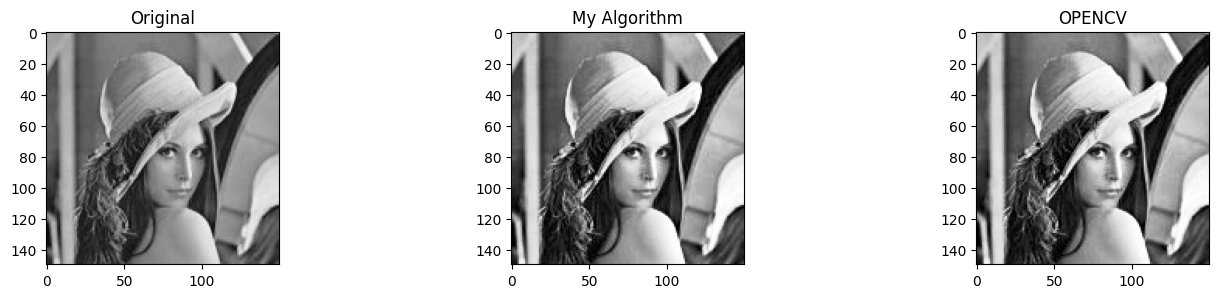

In [205]:
def probalityDensity(img_gray):
    n,m = img_gray.shape
    
    # nG levels (from 0 to max gray level in img)
    nG = np.max(img_gray) + 1;

    # step1: initialize an array with 237 elements from 0->max(maxList) = 0-236
    hArr = np.zeros(nG, dtype=int);

    # step2: count number appears of each level
    for i in img_gray:
        for j in i:
            hArr[j] +=1;

    # step 3
    tArr = [];
    tArr.append(hArr[0]);
    for i in range(1,nG):
        val = tArr[i-1] + hArr[i]
        tArr.append(val);

    # step4: chuan hoa tR
    for i in range(0,nG):
        tArr[i] = round((nG-1)/(n*m) * tArr[i]);

    resArr = img_gray.copy()
    for i in range(n):
        for j in range(m):
            val = resArr[i][j];
            resArr[i][j] = tArr[val]         
    return resArr

dst = cv2.equalizeHist(grayImg)

resArr = probalityDensity(grayImg)
plotToCompare(grayImg, resArr, dst)

# Geometry Transformation #
## Linear interpolation ##
<b> Nhận xét: </b>
1. Scale up
- Ảnh cho ra bị nhạt so với ảnh gốc
- Ảnh dùng bằng OpenCV sẽ cho ra đậm hơn ảnh gốc
2. Scale down
- Ảnh cho ra có tình trạng blocky nhiều hơn so với ảnh thư viện


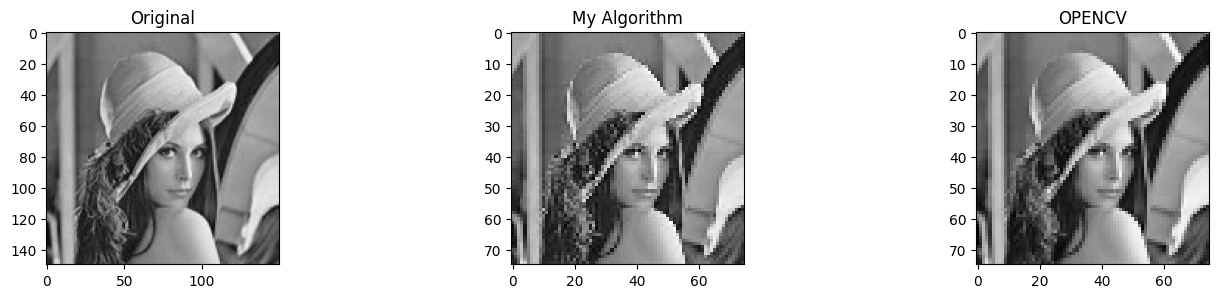

In [227]:
# scale img
# def scaleImg(scalePropor, grayImg):
n,m = grayImg.shape

# aX, aY decide the proportion for scalign
aX = 0.5;
aY = 0.5;
gSize = [round(aX*n), round(aY*m)];

# scalePropor = 2;
gArr = np.zeros((gSize[0], gSize[1]), dtype=int);

# scale in co-ordinate (co-ordinate transformation)
for i in range(n):
    for j in range(m):
        x = round(i*aX);
        y = round(j*aY);
        if(x<gSize[0] and y<gSize[1]):
            gArr[x,y] = grayImg[i][j]

# phep bien doi T-1
def calcOrgCord(gX, gY, aX, aY):
    return(gX/aX, gY/aY)

# nội suy giá trị màu 
for gX in range(gArr.shape[0]):
    for gY in range(gArr.shape[1]):
        fX, fY = calcOrgCord(gX, gY, aX, aY)
        l = round(fX)
        k = round(fY)
        # avoid out of range index
        if(l >= n-1) : l=n-2
        if(k >= m-1) : k=n-2
        a = fX-l
        b = fY-k
        gArr[gX][gY] = round((1-a)*(1-b)*grayImg[l][k] + (1-b)*(a)*grayImg[l+1][k] + (1-a)*(b)*grayImg[l][k+1] + a*b*grayImg[l+1][k+1])

        if(gArr[gX][gY] > 255):
            gArr[gX][gY] = 255
        
        if(gArr[gX][gY] < 0):
            gArr[gX][gY] = 0

dst = cv2.resize(grayImg, (gSize[0],gSize[1]), cv2.INTER_LINEAR)
plotToCompare(grayImg, gArr, dst)


    

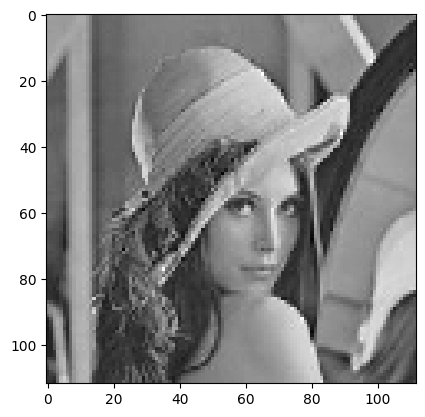